<a href="https://colab.research.google.com/github/Love1117/Machine_learning-Projects/blob/main/Machine_Learning%20Project/01_Supervised-%20Machine%20Learning/01_Linear_Regression/Car_price_prediction/Car_price_prediction1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

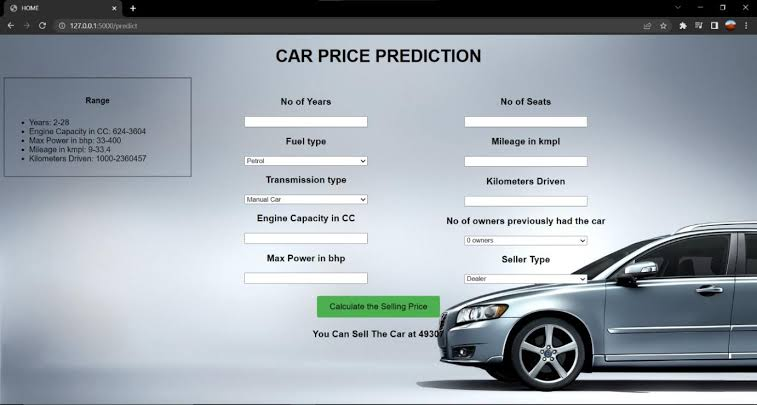
#**Used Car 🚗 Price Prediction using LinearRegression**
📘 Project Overview

This project is an essential data preparation phase for a machine learning model focused on predicting the selling price of used cars based on their features.

The ultimate objective is to develop a machine learning model capable of accurately estimating a used car's selling price based on its attributes, such as nmae, year, kilometers driven, fuel seller_type, transmission, owner, millage , engine, maximum power and seats.

**Data Loading and Cleaning**

In [113]:
from google.colab import drive
drive.mount("/content/drive")
import pandas as pd
import numpy as np

df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/cardekho.csv")
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [114]:
# Confirming to see if my data has null or duplicate values

print(f"Null_Values: {df.isna().sum()}")
print("\n")
print(f"Duplicated_Values: {df.duplicated().sum()}")

Null_Values: name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64


Duplicated_Values: 1202


In [115]:
# drop duplicates
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df.duplicated().sum()

#converting string column to numeric
df["max_power"] = df["max_power"].str.strip( " " ''"").replace(["",  np.nan])
df["max_power"] = df["max_power"].astype(float)
df = df.rename(columns={"mileage(km/ltr/kg)":"mileage"})
df.head()

/tmp/ipython-input-3338503443.py:7: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df["max_power"] = df["max_power"].str.strip( " " ''"").replace(["",  np.nan])


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


**Feature Engineering**

In [116]:
#Joining 2 columns to give meaning
df["car_model and year"] = df["name"] + "'" + " " + df["year"].astype(str)

#label encoding on transmission
df["transmission"] = df["transmission"].map({"Manual":0, "Automatic":1})

# one hot encoding
df = pd.get_dummies(df, drop_first=True, columns=["fuel","owner","seller_type"], dtype=int)


In [117]:
# I noticed using frequency Encoding might mislead the model since few cars appear thesame number of times
df["car_model and year"].value_counts()

,count
car_model and year,
Maruti Swift VDI' 2013,25
Maruti Swift Dzire VDI' 2014,25
Maruti Swift Dzire VDI' 2017,23
Maruti Swift Dzire VDI' 2013,20
Renault KWID RXT' 2016,16
...,...
BMW 3 Series 320d Highline' 2009,1
Maruti Ertiga BSIV LXI' 2017,1
Mahindra XUV500 AT W6 1.99 mHawk' 2016,1


In [118]:
df.head()

,name,year,selling_price,km_driven,transmission,mileage,engine,max_power,seats,car_model and year,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,seller_type_Individual,seller_type_Trustmark Dealer
0,Maruti Swift Dzire VDI,2014,450000,145500,0,23.40,1248.0,74.00,5.0,Maruti Swift Dzire VDI' 2014,1,0,0,0,0,0,0,1,0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,0,21.14,1498.0,103.52,5.0,Skoda Rapid 1.5 TDI Ambition' 2014,1,0,0,0,1,0,0,1,0
2,Honda City 2017-2020 EXi,2006,158000,140000,0,17.70,1497.0,78.00,5.0,Honda City 2017-2020 EXi' 2006,0,0,1,0,0,0,1,1,0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,0,23.00,1396.0,90.00,5.0,Hyundai i20 Sportz Diesel' 2010,1,0,0,0,0,0,0,1,0
4,Maruti Swift VXI BSIII,2007,130000,120000,0,16.10,1298.0,88.20,5.0,Maruti Swift VXI BSIII' 2007,0,0,1,0,0,0,0,1,0


In [119]:
# creating a target mean for car and year (converting from text to numeric)
target_mean = df.groupby('car_model and year')['selling_price'].mean().to_dict()
df['car_model_ and year encoded'] = df['car_model and year'].map(target_mean)
df.head()


freq_car_name = df["name"].value_counts().to_dict()
df["freq_name"] = df["name"].map(freq_car_name)
df.head()

,name,year,selling_price,km_driven,transmission,mileage,engine,max_power,seats,car_model and year,...,fuel_LPG,fuel_Petrol,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,seller_type_Individual,seller_type_Trustmark Dealer,car_model_ and year encoded,freq_name
0,Maruti Swift Dzire VDI,2014,450000,145500,0,23.40,1248.0,74.00,5.0,Maruti Swift Dzire VDI' 2014,...,0,0,0,0,0,0,1,0,486599.76,118
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,0,21.14,1498.0,103.52,5.0,Skoda Rapid 1.5 TDI Ambition' 2014,...,0,0,0,1,0,0,1,0,505000.00,3
2,Honda City 2017-2020 EXi,2006,158000,140000,0,17.70,1497.0,78.00,5.0,Honda City 2017-2020 EXi' 2006,...,0,1,0,0,0,1,1,0,154000.00,7
3,Hyundai i20 Sportz Diesel,2010,225000,127000,0,23.00,1396.0,90.00,5.0,Hyundai i20 Sportz Diesel' 2010,...,0,0,0,0,0,0,1,0,225000.00,1
4,Maruti Swift VXI BSIII,2007,130000,120000,0,16.10,1298.0,88.20,5.0,Maruti Swift VXI BSIII' 2007,...,0,1,0,0,0,0,1,0,130000.00,2


In [120]:
#dropping irrelevant columns
df = df.drop(columns=["name","car_model and year"])

**Seperating my input variable and target variable**

In [121]:
x = df.drop(columns=["selling_price"])
y = df["selling_price"]


In [122]:
x.head()

,year,km_driven,transmission,mileage,engine,max_power,seats,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,seller_type_Individual,seller_type_Trustmark Dealer,car_model_ and year encoded,freq_name
0,2014,145500,0,23.40,1248.0,74.00,5.0,1,0,0,0,0,0,0,1,0,486599.76,118
1,2014,120000,0,21.14,1498.0,103.52,5.0,1,0,0,0,1,0,0,1,0,505000.00,3
2,2006,140000,0,17.70,1497.0,78.00,5.0,0,0,1,0,0,0,1,1,0,154000.00,7
3,2010,127000,0,23.00,1396.0,90.00,5.0,1,0,0,0,0,0,0,1,0,225000.00,1
4,2007,120000,0,16.10,1298.0,88.20,5.0,0,0,1,0,0,0,0,1,0,130000.00,2


**Spliting into training and testing**

In [123]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=91)

# Normalizing features using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
x_train = pd.DataFrame(scale.fit_transform(x_train))
x_test = pd.DataFrame(scale.fit_transform(x_test))

**Model Building:** using LinearRegression for simple Linear Relationships

In [124]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)


LinearRegression()

**Training and testing score**

In [125]:
x_train_score = lin_reg.score(x_train, y_train)
x_test_score = lin_reg.score(x_test, y_test)
print(f"Training_score: {x_train_score}")
print(f"Testing_score: {x_test_score}")

Training_score: 0.9920045791410657
Testing_score: 0.8556142791726025


**Checking accuracy using R-square and Mean Squared Error**

In [126]:
from sklearn.metrics import r2_score, mean_squared_error
y_pred = lin_reg.predict(x_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")

R-squared: 0.8556142791726025
Mean Squared Error: 54157892747.36896


In [127]:
y_pred[:10]

array([363105.25955884, 562517.1217133 , 322421.00581375, 149799.20008978,
       275195.42238235, 565830.99876265, 439839.90821488, 482366.60532085,
       245485.01054556, 687254.10484479])

#**📊 Result**
A well-trained LinearRegression model capable of predicting used car prices with strong accuracy and generalization performance.



#**🧰 Tools & Libraries Used:**
Python

Pandas, NumPy for data handling

Scikit-learn for preprocessing and model training

Google Colab for running and testing the notebook